In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
%matplotlib inline

In [2]:
#opening the data set
data = pd.read_csv('Fortune 500 2017 - Fortune 500.csv')#,delimiter=';')
#print(data.info())
#data[120:130]

In [3]:
drop_features = ['Title','Website','Sector', 'Industry','Hqlocation','Hqaddr','Hqcity','Hqstate','Hqzip','Hqtel','Ceo','Ceo-title','Address','Ticker','Fullname']
data_new = data.loc[:,['Rank','Employees','Revenues','Revchange','Profits','Prftchange','Assets','Totshequity']]
data_new

,Rank,Employees,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,2300000,485873,0.8,13643.0,-7.2,198825,77798.0
1,2,367700,223604,6.1,24074.0,0.0,620854,283001.0
2,3,116000,215639,-7.7,45687.0,-14.4,321686,128249.0
3,4,72700,205004,-16.7,7840.0,-51.5,330314,167325.0
4,5,68000,192487,6.2,2258.0,53.0,56563,8924.0
...,...,...,...,...,...,...,...,...
495,496,31000,5197,5.8,378.2,4.2,2148,-1698.0
496,497,4200,5170,23.9,382.1,5.2,9737,4229.0
497,498,8500,5169,4.0,-214.3,5.2,48083,31049.0
498,499,4431,5164,4.0,-214.3,5.2,15167,6597.0


In [4]:
data_new.shape
# df = data_new.astype({'Prftchange':'float'})
# for i in data_new['Prftchange']:
# #     i.replace(",", "")
#     print(i.strip(","))
    
# data_new["Prftchange"] = pd.to_numeric(data_new["Prftchange"])
# df = data_new.astype({'Prftchange':'float'})

(500, 8)

In [6]:
#drop_features = ['Title','Website','Sector', 'Industry','Hqlocation','Hqaddr','Hqcity','Hqstate','Hqzip','Hqtel','Ceo','Ceo-title','Address','Ticker','Fullname']
#data_new = data['Rank','Employees','Revenues','Revchange','Profits','Prftchange','Assets','Totshequity']
# data_new = data.loc[:,['Rank','Employees','Revenues','Revchange','Profits','Prftchange','Assets','Totshequity']]
#t_array = data_new[['Rank','Employees','Revenues','Revchange','Profits','Prftchange','Assets','Totshequity']].to_numpy()  
# print(type(t_array))
# x = t_array
# abs(x)
data_new['Revchange'] = data_new['Revchange'].abs()
data_new['Revenues'] = data_new['Revenues'].abs()
data_new['Prftchange'] = data_new['Prftchange'].abs()
data_new['Totshequity'] = data_new['Totshequity'].abs()
#print(type(data_new))

# Handling the missing values if any
data_new.fillna(method ='ffill', inplace = True)
  
# data_new.head()
# # # Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
# # #print(data_new)
data_scaled = scaler.fit_transform(data_new)
  
# Normalizing the data so that the data
# approximately follows a Gaussian distribution
data_normalized = normalize(data_scaled)
  
# Converting the numpy array into a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized)
  
# # Renaming the columns
data_normalized.columns = data_new.columns

data_normalized.head()
data_scaled = normalize(data_new)
data_scaled = pd.DataFrame(data_scaled, columns=data_new.columns)
data_scaled.head()
print(type(data_new))

<class 'pandas.core.frame.DataFrame'>


<Figure size 432x288 with 0 Axes>

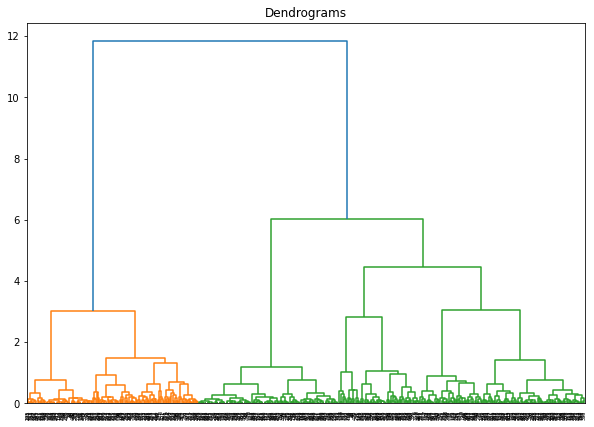

<Figure size 432x288 with 0 Axes>

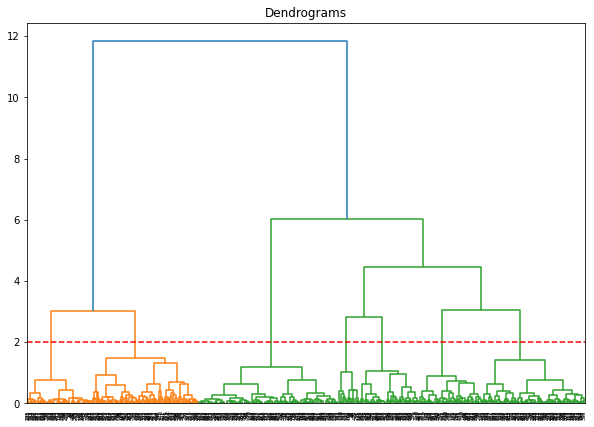

<Figure size 432x288 with 0 Axes>

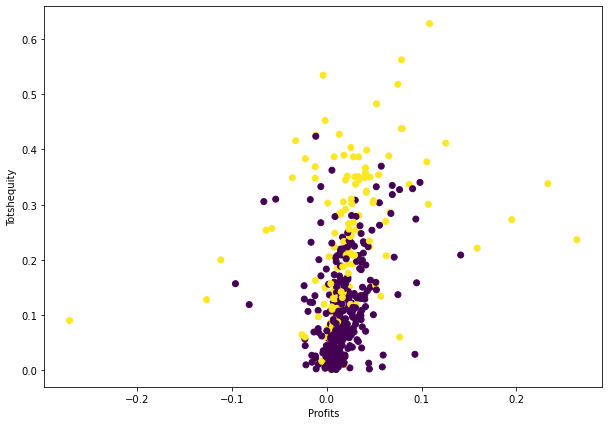

In [10]:
#Hierachal Clustering
from sklearn.cluster import AgglomerativeClustering
fig1 = plt.figure()
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
fig2 = plt.figure()
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=2, color='r', linestyle='--')

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)
fig3 = plt.figure()
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Profits'], data_scaled['Totshequity'], c=cluster.labels_) 
plt.xlabel('Profits')
plt.ylabel('Totshequity')
fig1.savefig('plot1.png')
fig2.savefig('plot2.png')
fig3.savefig('plot3.png')

<Figure size 432x288 with 0 Axes>

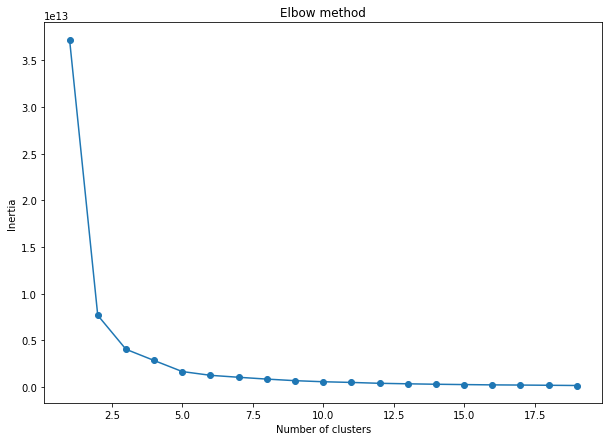

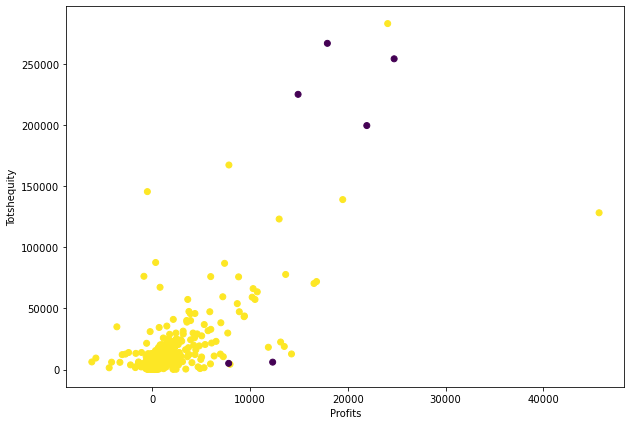

In [11]:
#Kmeans
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
# X= -2 * np.random.rand(100,2)
# X1 = 1 + 2 * np.random.rand(50,2)
# X[50:100, :] = X1
# plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = ‘b’)
# plt.show()
# Kmean = KMeans(n_clusters=2)
# Kmean.fit(X)
# Kmean.cluster_centers_
# plt.scatter(X[ : , 0], X[ : , 1], s =50, c=’b’)
# plt.scatter(-0.94665068, -0.97138368, s=200, c=’g’, marker=’s’)
# plt.scatter(2.01559419, 2.02597093, s=200, c=’r’, marker=’s’)
# plt.show()
# Kmean.labels_
# sample_test=np.array([-3.0,-3.0])
# second_test=sample_test.reshape(1, -1)
# Kmean.predict(second_test)
data = data_new[["Revenues","Assets","Revchange","Profits"]]
inertias = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
fig4 = plt.figure()
plt.figure(figsize=(10, 7))
plt.plot(range(1,20), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
x = data_new[["Profits"]]
y = data_new[["Totshequity"]]
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
plt.figure(figsize=(10, 7))
plt.scatter(x, y, c=kmeans.labels_)
plt.xlabel('Profits')
plt.ylabel('Totshequity')
plt.show()
fig4.savefig('plot4.png')

In [9]:
model = KMeans(n_clusters=2, init='k-means++',random_state=32)

# re-fit our model
model.fit(data_scaled)

# compute an average silhouette score for each point
silhouette_score_average = silhouette_score(data_scaled, model.predict(data_scaled))

# lets see what that score it
print(silhouette_score_average)

#0.5334538566022892
# while that's nice, what does that tell us? there could still be a points with a negative value



0.5334538566022892
